In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [2]:
shopping_nouns = pd.read_csv(r'C:\Users\NT550\asac\SIH\SIH\code2\result\shopping_nouns.csv')
len(shopping_nouns)

57141

In [3]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [4]:
shopping_data = pd.read_csv(r"C:\Users\NT550\asac\SIH\SIH\code2\result\naver_shopping_preprocess.csv", index_col=0)
shopping_data.head()

,Unnamed: 0.1,Unnamed: 0,제품명,가격,평균평점,아이디,평점,날짜,종류,요약,리뷰,ko_review,token_nouns,token,cleaned_tokens
0,0,0,허니바이허니 천연 벌꿀 스틱 90포입 국산 아카시아 5종 선물 세트 [원산지:국산]오늘출발,"72,000",4.9,miri*******,5.0,23.08.16.,30포 선택1: 아카시아 / 30포 선택2: 아카시아 / 30포 선택3: 아카시아\n,유통기한아주 넉넉해요포장꼼꼼해요편리편리해요,한달사용기재구매먹기 편하고 품질도 좋아요. 받는 손님도 좋아 하시고 구매등급도 따로 있어서 좋아요. 문제 생기면 바로 처리 해주시고 좋아요!,한달사용기재구매먹기 편하고 품질도 좋아요 받는 손님도 좋아 하시고 구매등급도 따로 있어서 좋아요 문제 생기면 바로 처리 해주시고 좋아요,"['달', '사용', '기재', '구매', '품질', '손', '구매', '등급', '문제', '처리']","[('한', 'XPN'), ('달', 'NNG'), ('사용', 'NNG'), ('기재', 'NNG'), ('구매', 'NNG'), ('먹', 'VV'), ('기', 'ETN'), ('편하', 'VA'), ('고', 'EC'), ('품질', 'NNG'), ('도', 'JX'), ('좋', 'VA'), ('아요', 'EF'), ('받', 'VV'), ('는', 'ETM'), ('손', 'NNG'), ('님', 'XSN'), ('도', 'JX'), ('좋아하', 'VV'), ('시', 'EP'), ('고', 'EC'), ('구매', 'NNG'), ('등급', 'NNG'), ('도', 'JX'), ('따로', 'MAG'), ('있', 'VA'), ('어서', 'EC'), ('좋', 'VA'), ('아요', 'EF'), ('문제', 'NNG'), ('생기', 'VV'), ('면', 'EC'), ('바로', 'MAG'), ('처리', 'NNG'), ('하', 'VV'), ('아', 'EC'), ('주', 'VX'), ('시', 'EP'), ('고', 'EC'), ('좋', 'VA'), ('아요', 'EF')]","['사용', '기재', '구매', '품질', '손', '구매', '등급', '문제', '처리']"
1,1,1,허니바이허니 천연 벌꿀 스틱 90포입 국산 아카시아 5종 선물 세트 [원산지:국산]오늘출발,"72,000",4.9,dltm*****,5.0,23.07.28.,30포 선택1: 밤 / 30포 선택2: 밤 / 30포 선택3: 밤\n,유통기한꽤 남았어요포장꼼꼼해요편리편리해요,간편하게 하루한포씩먹게되요~냉장이나 냉동으로 해서 시원하게 먹으니 맛잇어요!!밤꿀이 많이 쓸줄알앗는데 쓴건 잘 안먹는편이기도 하구요 생각보다 진하니 먹을만했어요 요즘 면역이 많이 떨어지기도 했고 겸사겸사 구매했는데 마음에들어서 다음에 재구매해야겠어요! 선물용으로도 너무 좋을거 같아요!,간편하게 하루한포씩먹게되요냉장이나 냉동으로 해서 시원하게 먹으니 맛잇어요밤꿀이 많이 쓸줄알앗는데 쓴건 잘 안먹는편이기도 하구요 생각보다 진하니 먹을만했어요 요즘 면역이 많이 떨어지기도 했고 겸사겸사 구매했는데 마음에들어서 다음에 재구매해야겠어요 선물용으로도 너무 좋을거 같아요,"['하루', '포', '냉장', '냉동', '밤꿀', '쓸줄알', '편', '생각', '만', '요즘', '면역', '겸사겸사', '마음', '다음', '선물', '거']","[('간편하', 'VA'), ('게', 'EC'), ('하루', 'NNG'), ('한', 'MMN'), ('포', 'NNG'), ('씩', 'XSN'), ('먹', 'VV'), ('게', 'EC'), ('되', 'VV'), ('요', 'EC'), ('냉장', 'NNG'), ('이나', 'JC'), ('냉동', 'NNG'), ('으로', 'JKB'), ('하', 'VV'), ('아서', 'EC'), ('시원하', 'VA'), ('게', 'EC'), ('먹', 'VV'), ('으니', 'EC'), ('맛잇', 'VV'), ('어요', 'EF'), ('밤꿀', 'NNG'), ('이', 'JKS'), ('많이', 'MAG'), ('쓸줄알', 'NNG'), ('앗', 'VV'), ('는데', 'EC'), ('쓰', 'VV'), ('ㄴ거', 'EC'), ('ㄴ', 'JX'), ('잘', 'MAG'), ('안', 'MAG'), ('먹', 'VV'), ('는', 'ETM'), ('편', 'NNB'), ('이', 'VCP'), ('기', 'ETN'), ('도', 'JX'), ('하', 'VX'), ('구', 'EF'), ('요', 'JX'), ('생각', 'NNG'), ('보다', 'JKB'), ('진하', 'VA'), ('니', 'EC'), ('먹', 'VV'), ('을', 'ETM'), ('만', 'NNB'), ('하', 'XSA'), ('았', 'EP'), ('어요', 'EF'), ('요즘', 'NNG'), ('면역', 'NNG'), ('이', 'JKS'), ('많이', 'MAG'), ('떨어지', 'VV'), ('기', 'ETN'), ('도', 'JX'), ('하', 'VX'), ('았', 'EP'), ('고', 'EC'), ('겸사겸사', 'NNG'), ('구매하', 'VV'), ('았', 'EP'), ('는데', 'EC'), ('마음', 'NNG'), ('에', 'JKB'), ('들', 'VV'), ('어서', 'EC'), ('다음', 'NNG'), ('에', 'JKB'), ('재구매하', 'VV'), ('아야', 'EC'), ('하', 'VX'), ('겠', 'EP'), ('어요', 'EF'), ('선물', 'NNG'), ('용', 'XSN'), ('으로', 'JKB'), ('도', 'JX'), ('너무', 'MAG'), ('좋', 'VA'), ('을', 'ETM'), ('거', 'NNB'), ('같', 'VA'), ('아요', 'EF')]","['하루', '냉장', '냉동', '밤꿀', '쓸줄알', '편', '생각', '요즘', '면역', '겸사겸사', '마음', '다음', '선물']"
2,2,2,허니바이허니 천연 벌꿀 스틱 90포입 국산 아카시아 5종 선물 세트 [원산지:국산]오늘출발,"72,000",4.9,yjdr****,5.0,23.08.06.,30포 선택1: 올인원 / 30포 선택2: 올인원 / 30포 선택3: 아카시아\n,유통기한꽤 남았어요포장꼼꼼해요편리편리해요,홍삼이 여자몸에 안좋다고해서.. 그동안 안먹다가 꿀 스틱 보고 주문했습니다\n당떨어지기전에 먹으면 좋구요 밖에서도 쉽게 먹을수있어요. 이지컷이 잘 뜯어집니다.\n캡슐커피 내려먹을때 넣어먹을수도 있네요\n다먹으면 또 주문하려구요 ㅎㅎ,홍삼이 여자몸에 안좋다고해서 그동안 안먹다가 꿀 스틱 보고 주문했습니다당떨어지기전에 먹으면 좋구요 밖에서도 쉽게 먹을수있어요 이지컷이 잘 뜯어집니다캡슐커피 내려먹을때 넣어먹을수도 있네요다먹으면 또 주문하려구요 ㅎㅎ,"['홍삼', '여자', '몸', '동안', '꿀', '스틱', '당', '전', '밖', '수', '지컷', '캡슐', '커피', '때', '수', 'ㅎ', 'ㅎ']","[('홍삼', 'NNG'), ('이', 'JKS'), ('여자', 'NNG'), ('몸', 'NNG'), ('에', 'JKB'), ('안', 'MAG'), ('좋', 'VA'), ('다고', 'EC'), ('하', 'VV'), ('아서', 'EC'), ('그', 'MMD'), ('동안', 'NNG'), ('안', 'MAG'), ('먹', 'VV'), ('다가', 'EC'), ('꿀', 'NNG'), ('스틱', 'NNG'), ('보', 'VV'), ('고', 'EC'), ('주문하', 'VV'), ('았', 'EP'), ('습니다', 'EF'), ('당', 'NNG'), ('떨어지', 'VV'), ('기', 'ETN'), ('전', 'NNG'), ('에', 'JKB'), ('먹', 'VV'), ('으면', 'EC'), ('좋', 'VA'), ('구', 'EC'), ('요', 'JX'), ('밖', 'NNG'), ('에서', 'JKB'), ('도', 'JX'), ('쉽', 'VA'), ('게', 'EC'),

In [5]:
len(shopping_data['제품명'].unique())

147

In [6]:
""" gift_reviews = shopping_data[shopping_data['리뷰'].str.contains('선물')]

gift_reviews.head() """

" gift_reviews = shopping_data[shopping_data['리뷰'].str.contains('선물')]\n\ngift_reviews.head() "

In [7]:
shopping_data['cleaned_tokens'].dropna(inplace=True)

In [8]:
def kw_in_df(keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(shopping_nouns[shopping_nouns['리뷰'].apply(lambda x:keyword in x)]['리뷰']),'건')
    return shopping_nouns[shopping_nouns['리뷰'].apply(lambda x:keyword in x)]['리뷰']

In [9]:
shopping_data.loc[57012]

Unnamed: 0.1                                                                                                                                                                                                                                                                                                                  57012
Unnamed: 0                                                                                                                                                                                                                                                                                                                      705
제품명                                                                                                                                                                                                                                                                                    비크로프트 마누카꿀 꿀스틱 MGO300+100스틱 [원산지:호주산(비크로프트)]
가격                          

In [10]:
def kw_in_nouns(keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(shopping_nouns[shopping_nouns['cleaned_tokens'].apply(lambda x:keyword in x)]['리뷰']),'건')
    return shopping_nouns[shopping_nouns['cleaned_tokens'].apply(lambda x:keyword in x)]['리뷰']

In [11]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = r'C:\Users\NT550\asac\SIH\SIH\Kurly\NanumBarunGothic.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [12]:
shopping_nouns.dropna(subset=['리뷰'], inplace=True)
shopping_nouns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55796 entries, 0 to 57140
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  55796 non-null  int64  
 1   Unnamed: 0    55796 non-null  int64  
 2   제품명           55796 non-null  object 
 3   가격            55796 non-null  object 
 4   평균평점          51760 non-null  float64
 5   아이디           55796 non-null  object 
 6   평점            55796 non-null  float64
 7   날짜            55796 non-null  object 
 8   종류            54441 non-null  object 
 9   요약            55796 non-null  object 
 10  리뷰            55796 non-null  object 
 11  ko_review     55763 non-null  object 
 12  token_nouns   55796 non-null  object 
 13  token         55796 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 6.4+ MB


In [14]:
shopping_nouns['token_nouns'].info()

<class 'pandas.core.series.Series'>
Int64Index: 55796 entries, 0 to 57140
Series name: token_nouns
Non-Null Count  Dtype 
--------------  ----- 
55796 non-null  object
dtypes: object(1)
memory usage: 871.8+ KB


In [15]:
def wc_kw(kw_option, keyword):
    if kw_option == 1: # 1은 명사 키워드
        return wc_analysis(shopping_nouns[shopping_nouns['리뷰'].apply(lambda x:keyword in x)]['token_nouns'])
    else:
        return print('옵션 확인')

In [16]:
""" # 중복제거
shopping_nouns.drop_duplicates(['리뷰']) """

" # 중복제거\nshopping_nouns.drop_duplicates(['리뷰']) "

In [17]:
shopping_nouns.head()

,Unnamed: 0.1,Unnamed: 0,제품명,가격,평균평점,아이디,평점,날짜,종류,요약,리뷰,ko_review,token_nouns,token
0,0,0,허니바이허니 천연 벌꿀 스틱 90포입 국산 아카시아 5종 선물 세트 [원산지:국산]오늘출발,"72,000",4.9,miri*******,5.0,23.08.16.,30포 선택1: 아카시아 / 30포 선택2: 아카시아 / 30포 선택3: 아카시아\n,유통기한아주 넉넉해요포장꼼꼼해요편리편리해요,한달사용기재구매먹기 편하고 품질도 좋아요. 받는 손님도 좋아 하시고 구매등급도 따로 있어서 좋아요. 문제 생기면 바로 처리 해주시고 좋아요!,한달사용기재구매먹기 편하고 품질도 좋아요 받는 손님도 좋아 하시고 구매등급도 따로 있어서 좋아요 문제 생기면 바로 처리 해주시고 좋아요,"['달', '사용', '기재', '구매', '품질', '손', '구매', '등급', '문제', '처리']","[('한', 'XPN'), ('달', 'NNG'), ('사용', 'NNG'), ('기재', 'NNG'), ('구매', 'NNG'), ('먹', 'VV'), ('기', 'ETN'), ('편하', 'VA'), ('고', 'EC'), ('품질', 'NNG'), ('도', 'JX'), ('좋', 'VA'), ('아요', 'EF'), ('받', 'VV'), ('는', 'ETM'), ('손', 'NNG'), ('님', 'XSN'), ('도', 'JX'), ('좋아하', 'VV'), ('시', 'EP'), ('고', 'EC'), ('구매', 'NNG'), ('등급', 'NNG'), ('도', 'JX'), ('따로', 'MAG'), ('있', 'VA'), ('어서', 'EC'), ('좋', 'VA'), ('아요', 'EF'), ('문제', 'NNG'), ('생기', 'VV'), ('면', 'EC'), ('바로', 'MAG'), ('처리', 'NNG'), ('하', 'VV'), ('아', 'EC'), ('주', 'VX'), ('시', 'EP'), ('고', 'EC'), ('좋', 'VA'), ('아요', 'EF')]"
1,1,1,허니바이허니 천연 벌꿀 스틱 90포입 국산 아카시아 5종 선물 세트 [원산지:국산]오늘출발,"72,000",4.9,dltm*****,5.0,23.07.28.,30포 선택1: 밤 / 30포 선택2: 밤 / 30포 선택3: 밤\n,유통기한꽤 남았어요포장꼼꼼해요편리편리해요,간편하게 하루한포씩먹게되요~냉장이나 냉동으로 해서 시원하게 먹으니 맛잇어요!!밤꿀이 많이 쓸줄알앗는데 쓴건 잘 안먹는편이기도 하구요 생각보다 진하니 먹을만했어요 요즘 면역이 많이 떨어지기도 했고 겸사겸사 구매했는데 마음에들어서 다음에 재구매해야겠어요! 선물용으로도 너무 좋을거 같아요!,간편하게 하루한포씩먹게되요냉장이나 냉동으로 해서 시원하게 먹으니 맛잇어요밤꿀이 많이 쓸줄알앗는데 쓴건 잘 안먹는편이기도 하구요 생각보다 진하니 먹을만했어요 요즘 면역이 많이 떨어지기도 했고 겸사겸사 구매했는데 마음에들어서 다음에 재구매해야겠어요 선물용으로도 너무 좋을거 같아요,"['하루', '포', '냉장', '냉동', '밤꿀', '쓸줄알', '편', '생각', '만', '요즘', '면역', '겸사겸사', '마음', '다음', '선물', '거']","[('간편하', 'VA'), ('게', 'EC'), ('하루', 'NNG'), ('한', 'MMN'), ('포', 'NNG'), ('씩', 'XSN'), ('먹', 'VV'), ('게', 'EC'), ('되', 'VV'), ('요', 'EC'), ('냉장', 'NNG'), ('이나', 'JC'), ('냉동', 'NNG'), ('으로', 'JKB'), ('하', 'VV'), ('아서', 'EC'), ('시원하', 'VA'), ('게', 'EC'), ('먹', 'VV'), ('으니', 'EC'), ('맛잇', 'VV'), ('어요', 'EF'), ('밤꿀', 'NNG'), ('이', 'JKS'), ('많이', 'MAG'), ('쓸줄알', 'NNG'), ('앗', 'VV'), ('는데', 'EC'), ('쓰', 'VV'), ('ㄴ거', 'EC'), ('ㄴ', 'JX'), ('잘', 'MAG'), ('안', 'MAG'), ('먹', 'VV'), ('는', 'ETM'), ('편', 'NNB'), ('이', 'VCP'), ('기', 'ETN'), ('도', 'JX'), ('하', 'VX'), ('구', 'EF'), ('요', 'JX'), ('생각', 'NNG'), ('보다', 'JKB'), ('진하', 'VA'), ('니', 'EC'), ('먹', 'VV'), ('을', 'ETM'), ('만', 'NNB'), ('하', 'XSA'), ('았', 'EP'), ('어요', 'EF'), ('요즘', 'NNG'), ('면역', 'NNG'), ('이', 'JKS'), ('많이', 'MAG'), ('떨어지', 'VV'), ('기', 'ETN'), ('도', 'JX'), ('하', 'VX'), ('았', 'EP'), ('고', 'EC'), ('겸사겸사', 'NNG'), ('구매하', 'VV'), ('았', 'EP'), ('는데', 'EC'), ('마음', 'NNG'), ('에', 'JKB'), ('들', 'VV'), ('어서', 'EC'), ('다음', 'NNG'), ('에', 'JKB'), ('재구매하', 'VV'), ('아야', 'EC'), ('하', 'VX'), ('겠', 'EP'), ('어요', 'EF'), ('선물', 'NNG'), ('용', 'XSN'), ('으로', 'JKB'), ('도', 'JX'), ('너무', 'MAG'), ('좋', 'VA'), ('을', 'ETM'), ('거', 'NNB'), ('같', 'VA'), ('아요', 'EF')]"
2,2,2,허니바이허니 천연 벌꿀 스틱 90포입 국산 아카시아 5종 선물 세트 [원산지:국산]오늘출발,"72,000",4.9,yjdr****,5.0,23.08.06.,30포 선택1: 올인원 / 30포 선택2: 올인원 / 30포 선택3: 아카시아\n,유통기한꽤 남았어요포장꼼꼼해요편리편리해요,홍삼이 여자몸에 안좋다고해서.. 그동안 안먹다가 꿀 스틱 보고 주문했습니다\n당떨어지기전에 먹으면 좋구요 밖에서도 쉽게 먹을수있어요. 이지컷이 잘 뜯어집니다.\n캡슐커피 내려먹을때 넣어먹을수도 있네요\n다먹으면 또 주문하려구요 ㅎㅎ,홍삼이 여자몸에 안좋다고해서 그동안 안먹다가 꿀 스틱 보고 주문했습니다당떨어지기전에 먹으면 좋구요 밖에서도 쉽게 먹을수있어요 이지컷이 잘 뜯어집니다캡슐커피 내려먹을때 넣어먹을수도 있네요다먹으면 또 주문하려구요 ㅎㅎ,"['홍삼', '여자', '몸', '동안', '꿀', '스틱', '당', '전', '밖', '수', '지컷', '캡슐', '커피', '때', '수', 'ㅎ', 'ㅎ']","[('홍삼', 'NNG'), ('이', 'JKS'), ('여자', 'NNG'), ('몸', 'NNG'), ('에', 'JKB'), ('안', 'MAG'), ('좋', 'VA'), ('다고', 'EC'), ('하', 'VV'), ('아서', 'EC'), ('그', 'MMD'), ('동안', 'NNG'), ('안', 'MAG'), ('먹', 'VV'), ('다가', 'EC'), ('꿀', 'NNG'), ('스틱', 'NNG'), ('보', 'VV'), ('고', 'EC'), ('주문하', 'VV'), ('았', 'EP'), ('습니다', 'EF'), ('당', 'NNG'), ('떨어지', 'VV'), ('기', 'ETN'), ('전', 'NNG'), ('에', 'JKB'), ('먹', 'VV'), ('으면', 'EC'), ('좋', 'VA'), ('구', 'EC'), ('요', 'JX'), ('밖', 'NNG'), ('에서', 'JKB'), ('도', 'JX'), ('쉽', 'VA'), ('게', 'EC'), ('먹', 'VV'), ('을', 'ETM'), ('수', 'NNB'), ('있', 'VA'), ('어요', 'EF'), ('이', 'MMD'), ('지컷', 'NNG'), ('이', 'JKS'), ('잘', 'MAG'), ('뜯', 'VV'), ('어', 'EC'), ('

In [18]:
shopping_nouns['token_nouns'] = shopping_nouns['token_nouns'].apply(lambda x: eval(x))
shopping_nouns['token'] = shopping_nouns['token'].apply(lambda x: eval(x))

In [ ]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

# 제품리뷰별 키워드 비율 파악

### 명사 분석

In [ ]:
frequency_analysis(shopping_nouns['token_nouns'], 500)

,Token,Frequency
0,선물,13163
1,꿀,12400
2,포장,9174
3,맛,8679
4,구매,8624
...,...,...
495,소개,49
496,가격대,49
497,그것,49
498,거기,49


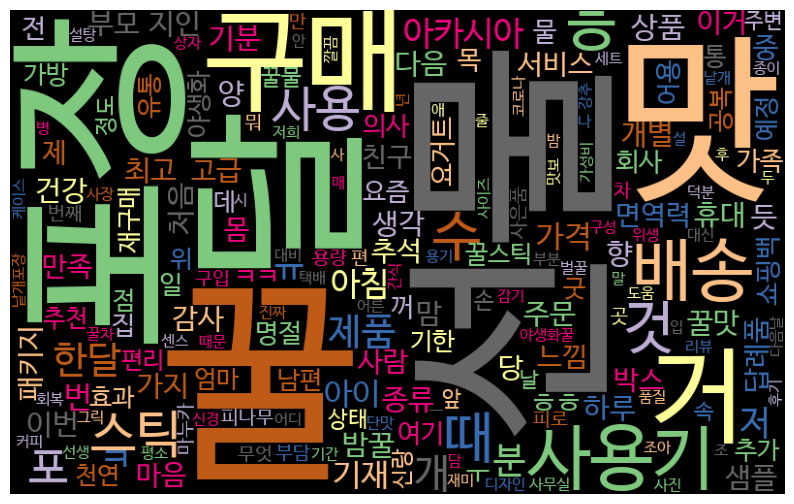

In [19]:
wc_analysis(shopping_nouns['token_nouns'])

In [20]:
kw_in_nouns('양')

KeyError: 'cleaned_tokens'

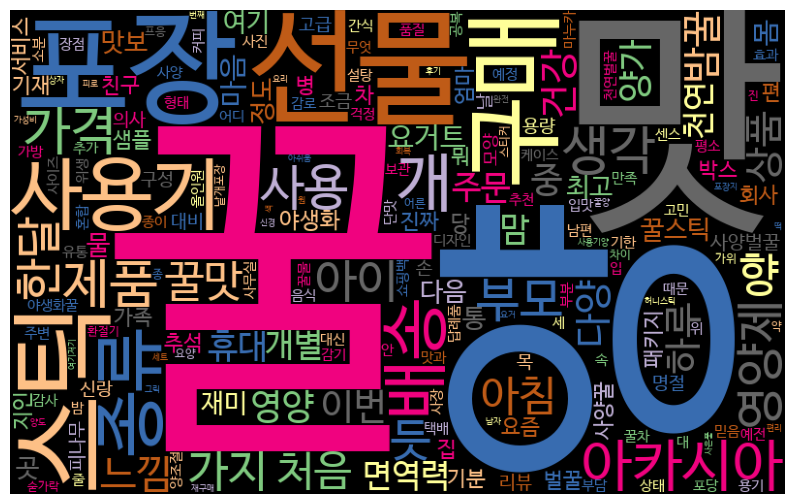

In [ ]:
wc_kw(1, '양')

패키지: 이쁘게, 깔끔하게, 고급스럽게
브랜딩(제주, 건강): 제주를 담은 건강하고 고급, 깔끔한 포장에 꿀 스틱 브랜딩하면 좋을 듯
첨가물:
레시피: 꿀물, 그릭요거트, 각종 차(쑥차, 캐모마일), 홍삼

꿀 선물은 왠지 올드해보였는데 워커비 만나고 편견이 싹 사라졌어요 스틱형이라 간편하게 꿀차를 마실수 있고 패키지들이 하나같이 감성터집니다!! 

선물용으로 샀는데 쇼핑백도 색상이 넘 이쁘네요. 캐릭터가 귀여워 보는사람도 같이 기분이 좋아 집니다.

In [ ]:
# 포장
package_kw = ['패키지', '포장', '쇼핑백', '디자인', '패키징', '고급', '패키', '보틀', '케이스', '키트', '용기', '색감', '포장지', '보자기', '캔', '스티커']

### 라벨링
- 유사한 의미의 단어 라벨링 진행

In [ ]:
shopping_all = pd.read_excel(r'C:\Users\NT550\asac\SIH\SIH\code2\result\쇼핑_명사_all.xlsx')
shopping_all.head()

In [ ]:
from collections import defaultdict

# 유사한 의미의 단어들 그룹화
similar_words = {
    '고급' : ['고급','우아','품위','럭셔리','고퀄','세련'],
    '예쁨' : ['예쁘','이쁘','예쁨','이쁨','이뿌','예뿌','아름다'],
    '깔끔' : ['깔끔','심플','정갈','정돈']
}

# 유사한 의미의 단어들을 그룹화하고 빈도수 합산
grouped_word_counts = defaultdict(int)
for idx, row in shopping_all.iterrows():
    word = row['단어']
    frequency = row['빈도수']
    
    for group, similar_words_list in similar_words.items():
        if word in similar_words_list:
            grouped_word_counts[group] += frequency
            break  # 그룹에 속한 경우 루프 종료

# 그룹화한 데이터를 DataFrame으로 변환
grouped_data = {'단어 그룹': [], '빈도수': []}
for group, frequency in grouped_word_counts.items():
    grouped_data['단어 그룹'].append(group)
    grouped_data['빈도수'].append(frequency)

group_df = pd.DataFrame(grouped_data)

# 결과 출력
group_df

In [ ]:
from collections import defaultdict

# 유사한 의미의 단어들 그룹화
similar_words = {
    '요거트': ['거트', '요거트', '그릭요거트'],
    '음료': ['커피','물','꿀물','음료', '우유', '주스','쥬스', '미숫가루', '선식','차','녹차','생강차','꿀차'],
    '과일': ['과일', '딸기', '복숭아', '레몬','바나나'],
    '빵/떡': ['빵','피자','떡','가래떡','샌드위치','토스트'],
    '견과류': ['견과','그래놀라','오트밀'],
    '샐러드': ['샐러드','토마토'],
    '치즈': ['치즈', '카이막','모짜렐라','크림','체다','부리따','리코타'],
    '홍삼': ['홍삼']
}

# 유사한 의미의 단어들을 그룹화하고 빈도수 합산
grouped_word_counts = defaultdict(int)
for idx, row in shopping_all.iterrows():
    word = row['단어']
    frequency = row['빈도수']
    
    for group, similar_words_list in similar_words.items():
        if word in similar_words_list:
            grouped_word_counts[group] += frequency
            break  # 그룹에 속한 경우 루프 종료

# 그룹화한 데이터를 DataFrame으로 변환
grouped_data = {'단어 그룹': [], '빈도수': []}
for group, frequency in grouped_word_counts.items():
    grouped_data['단어 그룹'].append(group)
    grouped_data['빈도수'].append(frequency)

grouped_df = pd.DataFrame(grouped_data)

# 결과 출력
grouped_df

In [ ]:
# 유사한 의미의 단어들 그룹화
similar_words = {
    'yogurt': ['거트', '요거트', '그릭요거트'],
    'water': ['물', '꿀물'],
    'dessert': ['디저트'],
    'coffee': ['커피'],
    'dduk': ['떡', '가래떡'],
    'juice': ['음료', '우유', '주스', '미숫가루', '선식'],
    'fruit': ['과일', '딸기', '복숭아', '레몬', '토마토'],
    'bread': ['빵'],
    'tea': ['차', '녹차'],
    'Nuts': ['견과'],
    'pizza': ['피자']
}

# 유사한 의미의 단어들을 그룹화하고 빈도수 합산
grouped_word_counts = defaultdict(int)
for idx, row in shopping_all.iterrows():
    word = row['단어']
    frequency = row['빈도수']
    
    for group, similar_words_list in similar_words.items():
        if word in similar_words_list:
            grouped_word_counts[group] += frequency
            break  # 그룹에 속한 경우 루프 종료

# 그룹화한 데이터를 DataFrame으로 변환
grouped_data = {'단어 그룹': [], '빈도수': []}
for group, frequency in grouped_word_counts.items():
    grouped_data['단어 그룹'].append(group)
    grouped_data['빈도수'].append(frequency)

grouped_df = pd.DataFrame(grouped_data)

# 결과 출력
print(grouped_df)

In [ ]:
grouped_df.to_csv('recipe')


'귀엽다'

In [ ]:
kw_in_df('양') 

' 양 ' 가 포함된 리뷰 총 2248 건


6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   입 심심할때 간식으로 먹으려고 샀어요. 건강도 생각해서요ㅎㅎ. 벌꿀에 여러 영양소?가 많다고 하더라고요. 찔끔찔끔 먹는걸 좋아해서 간식으로도 괜찮아요. 포장도 깔끔하고 맛도있습니다. 일부러 3통 모두 여러가지 섞인걸로 샀습니다. 그때그때 먹고싶은거 골라먹는 재미가 있어요
9                                           

In [ ]:
wc_kw(2, '귀엽')